# Teresa Practicing Gradient Descent for nD Linear Regression

### Overview:

After completing the [Machine Learning Specialization](https://www.coursera.org/specializations/machine-learning-introduction), Teresa will take the original [TL_Practice_2D_GradDec.ipynb]() file and...
- Modify it to analyse multidimensional data
- Add vectorization and normalization to the original linear regression code
- Use TensorFlow to compare results and performance

  
### Motivation:
- Practice supervised machine learning on multidimensional data
- Practice Data Visualization with multidimensional data
- Become more familiar with TensorFlow

## Step 0: Import all the necessary packages.

In [1]:
import numpy as np
import matplotlib.pyplot as plt # usually all we need from matplotlib
import matplotlib as mpl # just in case I need a more general mpl function than plyplot.
#%matplotlib widget 
# above enables interaction with plots produced by mpl
import pandas as pd
# more packages added later as needed.

# below tensorflow to check work
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

## Step 1: Load and Visualize Raw Data

### Load Data Using Pandas Package

Import the multi-dim houses.txt file provided by Andrew Ng using read_csv():

In [3]:
pd_housedata = pd.read_csv("data/houses.txt", names = ["Size (ft^2)","Num Beds", "Num Floors", "Age (Yrs)", "Price (1000$)"])

A couple things to note here:
- We did not have to specify type of delimeter because the file is already comma delimited (default for csv_read())
- We needed to add the *names = []* information because the original data did not come with headers.  By default, the first row of the text file becomes the header.

We will **confirm the data were successfully loaded** by simply displaying the data


In [4]:
pd_housedata

,Size (ft^2),Num Beds,Num Floors,Age (Yrs),Price (1000$)
0,952.0,2.0,1.0,65.0,271.5
1,1244.0,3.0,1.0,64.0,300.0
2,1947.0,3.0,2.0,17.0,509.8
3,1725.0,3.0,2.0,42.0,394.0
4,1959.0,3.0,2.0,15.0,540.0
...,...,...,...,...,...
95,1224.0,2.0,2.0,12.0,329.0
96,1432.0,2.0,1.0,43.0,388.0
97,1660.0,3.0,2.0,19.0,390.0
98,1212.0,3.0,1.0,20.0,356.0


We need to **convert this pandas DataFrame into a numpy array** before we can plot the data.

Code to do that, using pandas modules, below:

In [5]:
np_housedata = pd.DataFrame(pd_housedata).to_numpy()
np_housedata.shape

(100, 5)

### Plot the training data
Going to practice with subplots here to try and plot them all in one place...

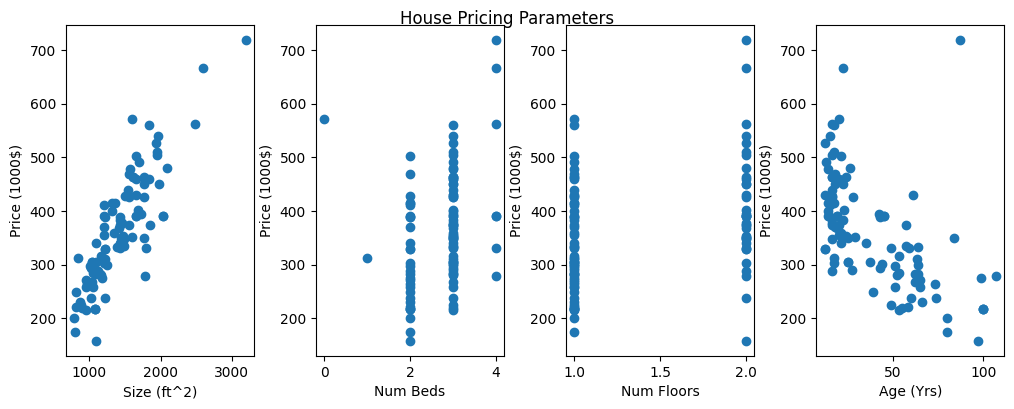

In [24]:
plt.close()
featnum = np_housedata.shape[1] -1
fig, ax = plt.subplots(1,featnum)
fig.suptitle("House Pricing Parameters")
fig.set_size_inches(10, 4)
for i in range(featnum):
    plt.subplot(1,featnum,i+1)
    plt.scatter(np_housedata[:,i],np_housedata[:,featnum])
    plt.xlabel(pd_housedata.columns[i])
    plt.ylabel(pd_housedata.columns[featnum])
fig.tight_layout(pad=0.2)
plt.show()


## Step 2: Data Processing

### Normalization:

In [27]:
def norm_zscore(X,y,norm_y = False):
    """
    Inputs:
        X : Feature matrix of data set (num_example x num_feature Numpy Array)
        y : y vector (num_example length Numpy Column Vector )
    Output:
        X_norm: Z-score Normalized Feature Matrix
        x_consts: Matrix containing Feature Means and Feature Stds 2 x numfeatures np array 
        y_norm: Z-score Normalized Target column if norm_y = True
        y_consts: Column Vector containing mean and std of Target values
    """
    ex_num = X.shape[0]
    x_means = np.mean(X,0)
    x_stds = np.std(X,0)
    x_consts = np.array([x_means,x_stds])
    X_norm = (X - x_means)/x_stds
    if norm_y:
        y_mean = np.mean(y)
        y_std = np.std(y)
        y_norm = (y - y_mean)/y_std
        y_consts = np.array([y_mean,y_std])
    else:
        y_norm = np.empty((ex_num,))
        y_consts = np.empty((ex_num,))
    return X_norm, x_consts, y_norm, y_consts

In [286]:
X = np_housedata[:,0:featnum]
y = np_housedata[:,featnum]
X_norm, x_consts, _, _ = norm_zscore(X,y)
#print(X_norm)
#print(y)

### Plot the Normalized Features vs Price

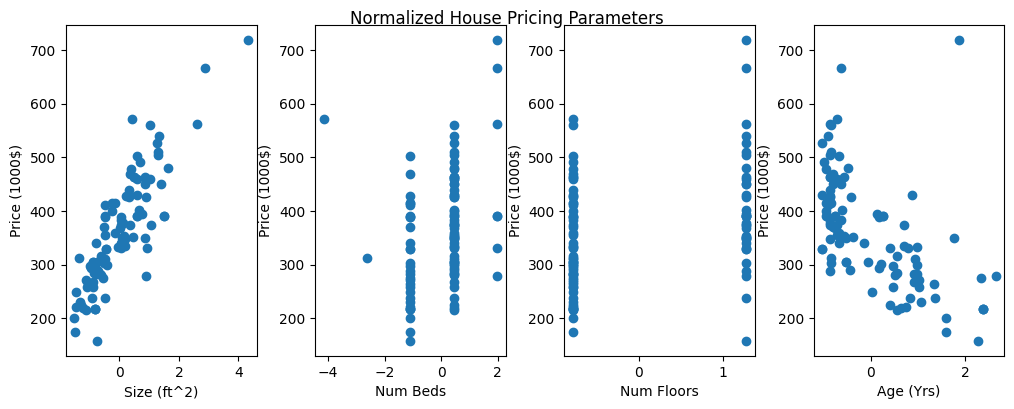

In [189]:
plt.close()
fig, ax = plt.subplots(1,featnum)
fig.suptitle("Normalized House Pricing Parameters")
fig.set_size_inches(10, 4)
for i in range(featnum):
    plt.subplot(1,featnum,i+1)
    plt.scatter(X_norm[:,i],y)
    plt.xlabel(pd_housedata.columns[i])
    plt.ylabel(pd_housedata.columns[featnum])
fig.tight_layout(pad=0.2)
plt.show()

## Step 3: Use TensorFlow to Predict the Model

Me trying to use tensorflow on my own for the first time...

In [207]:
#### Defining my super simple model
from tensorflow.keras.layers import Dense as Dense
model = tf.keras.Sequential([
    tf.keras.Input(shape=(4,)), # want to indicate that there are 4 features
    Dense(units = 1, activation = "linear") # want 1 linear regression node
], name = "model")
model.summary()
model.save_weights('init.weights.h5') # saving initial weights to be used later


Model: "model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_47 (Dense)                │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5 (20.00 B)

 Trainable params: 5 (20.00 B)

 Non-trainable params: 0 (0.00 B)

### Some data processing...

In [191]:
#### I need to split my dataset so I can cross validate / test performance of my model
tf_dataset = tf.data.Dataset.from_tensor_slices((X_norm, y)) # But first I need data to be in tf.data.Dataset format
train_dataset, other_dataset = tf.keras.utils.split_dataset(
    tf_dataset, left_size=0.6, right_size=0.4, shuffle=False
)

batchsize = train_dataset.cardinality().numpy()
train_dataset = train_dataset.batch(batchsize) # batching required in order to pass tf.data.Dataset into model.fit

### Creating a loop to compare different alpha (learning rate) values

In [277]:
from tensorflow.keras.losses import MeanSquaredError
alpha_range = np.geomspace(0.05,50,10)
print(batchsize)
num_epochs = 100
losses = np.empty((len(alpha_range),num_epochs))
weights = np.empty((featnum,len(alpha_range)))
biases = np.empty((1,len(alpha_range)))
for alpha in enumerate(alpha_range):
     opt = keras.optimizers.Adam(learning_rate=alpha[1]) # Required in order to converge below 1000 epochs
     model.load_weights('init.weights.h5') # when fitting model iteratively, it will use last instance of weights unless reset to initial
     model.compile(loss=MeanSquaredError(),optimizer = opt) # Chose mean squared error loss because that's what I'll use in my code
     history = model.fit(train_dataset, epochs=num_epochs, initial_epoch = 0)
     weight = model.layers[0].get_weights()[0]
     bias = model.layers[0].get_weights()[1]
     weights[:,alpha[0]] = weight[:,0]
     biases[:,alpha[0]] = bias
     losses[alpha[0],:] = history.history["loss"]

60
Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step - loss: 152111.6094
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 152050.2344
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 151988.9062
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 151927.5781
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 151866.2812
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 151805.0312
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 151743.7969
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 151682.5938
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 151621.4375
Epoch 10/100


/Users/teresa/Anaconda/anaconda3/envs/AndrewNg/lib/python3.11/site-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 6 variables whereas the saved optimizer has 0 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 151560.2969
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 151499.1875
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 151438.0938
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 151377.0625
Epoch 14/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 151316.0469
Epoch 15/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 151255.0625
Epoch 16/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 151194.1094
Epoch 17/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 151133.2188
Epoch 18/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 151072.3281
Epoch 19/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 151011.4844
Epoch 20/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 150950.6875
Epoch 21/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 150889.9062
Epoch 22/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 150829.1719
Epoch 23/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 150768.4531
Epoch 24/100
1/1 ━━━━━━━━━━━━━━━━

### Plotting the loss to make sure it actually finds a minimum

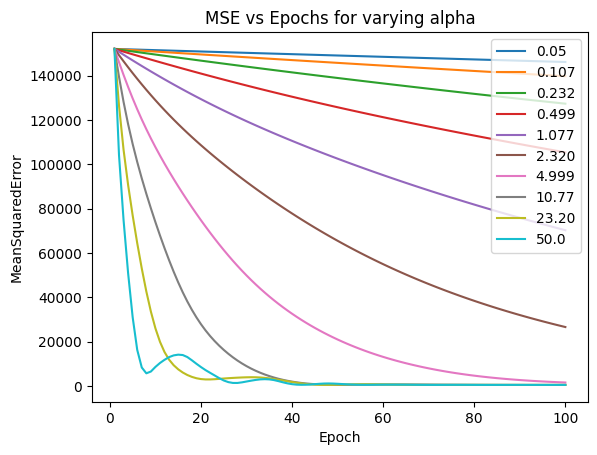

In [279]:
plt.close()
for alpha in enumerate(alpha_range):
    epochrange = np.arange(1,num_epochs+1,1)
    plt.plot(epochrange,losses[alpha[0],:], label = '{:1.5}'.format(str(alpha[1])))
plt.title("MSE vs Epochs for varying alpha")
plt.ylabel("MeanSquaredError")
plt.xlabel("Epoch")
plt.legend(loc = 'upper right')
plt.show()

 alpha = 10 appears to work, but it's a little suss because it's large...
 ### Will try to extract the weights from this...

In [287]:
print(f"Tensorflow Predicted Weights: {weights[:,7]}")
print(f"Tensorflow Predicted Bias: {biases[:,7]}")
print(f"Tensorflow Predicted J_min: {losses[7,-1]}")

Tensorflow Predicted Weights: [112.70546722 -23.91218567 -29.9927063  -37.19173431]
Tensorflow Predicted Bias: [361.69512939]
Tensorflow Predicted J_min: 421.9407653808594


### Will try to compare performance of training set with cross validation set

## Step 4: Code the Gradient Descent for a MultiLinear Regression

### Calculate and Plot the Straight Line
1. Function to do the calculation:

In [31]:
# Function to Predict Costs Based on SF:
def calculate_f_wb(w,b,X):
    f_wb = np.matmul(X,w) + b
    return f_wb
# Okay, that was kind of a waste of space...

2. Execute Function and Plot:

In [ ]:

w_best,b_best = np.polyfit(x,y,1) #returns the correct slope and intercept for linear fit (will compare with ours later)
print(f"[w,b] = [{w_best},{b_best}] for best fit")
f_wb = calculate_f_wb(w_best,b_best,x)

[w,b] = [0.13452528772024125,71.27049244872914] for best fit


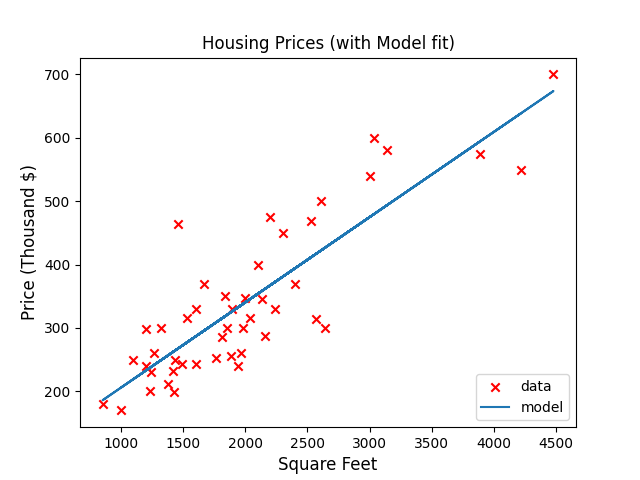

In [ ]:
plt.close()
plt.figure()
plt.scatter(np_housedata[:,0],np_housedata[:,2]/1000,marker = "x",color = "r",label = "data")
plt.plot(x,f_wb, linestyle = "-",label = "model")
plt.title("Housing Prices (with Model fit)")
plt.xlabel("Square Feet",fontsize = 12)
plt.ylabel("Price (Thousand $)", fontsize = 12)
plt.legend(loc = "lower right")
plt.show()

### Calculate and Visualize the Cost Function
1. Function to Compute J(w,b) for a single value of w and b

In [ ]:
def calculate_J(w,b,x,y):
    """
    Inputs:
        w,b : current guess for slope and intercept of linear fit, respectively
        x,y : input and output of training data, respectively
    Output:
        J: A scalar representing the ML normalized least squares cost function
    """
    m = x.shape[0]
    
    J = 0
    for i in range(m):
        J = J + (calculate_f_wb(w,b,x[i]) - y[i])**2
    J = J/(2*m)

    return J

2. More complicated function to compute J(w,b) for a wide range of w and b
   - For the purposes of visualization

In [ ]:
def calculate_J_wb(wv,bv,x,y):
    # I'm sure there is a way I can make this work for the w,b = scalar case as well, but I'm too lazy.
    """
    Function to calculate the cost function
    Inputs:
        wv,bv: arrays containing the values of (w,b) for the given output J(w,b)
        x,y: vectors containing the training input and output, respectively
    Output:
        Will produce an array of values J_{ij}(w,b) where w = wv[i,j] and b = bv[i,j]
    """
    m = x.shape[0]
    nw = wv.shape[0]
    nb = bv.shape[1]

    
    J = np.zeros([nw,nb]) # initialize J nw x nb matrix of zeros
    
    for i in range(nw):
        for j in range(nb):
            J_temp = 0
            for k in range(m):
                J_temp = J_temp + (calculate_f_wb(wv[i,j],bv[i,j],x[k])-y[k])**2
            J[i,j] = J_temp/(2*m)
    
    return J


2. Creating meshgrid of w and b

In [ ]:
nw,nb = (100,100)
w = np.linspace(0,.35,nw)
b = np.linspace(-100, 2e2, nb)
wv,bv = np.meshgrid(w,b, indexing = "ij")

3. Execute the function to find J_wb (array version)

In [ ]:
J_wb = calculate_J_wb(wv,bv,x,y)

4. Visualise the function (actually a challenge to properly scale the data so you can see the full concave shape)
   - **Method 1:** Use plt.imshow to see a quick heatmap.

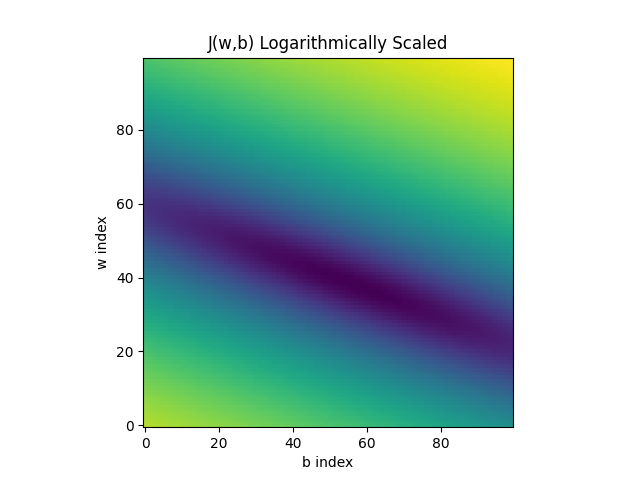

In [ ]:
plt.close()
plt.title("J(w,b) Logarithmically Scaled")
plt.imshow(J_wb, origin='lower', norm = "log")
plt.xlabel("b index")
plt.ylabel("w index")
plt.show()

- **Method 2:** Use plt.subplots for a 3D plot.

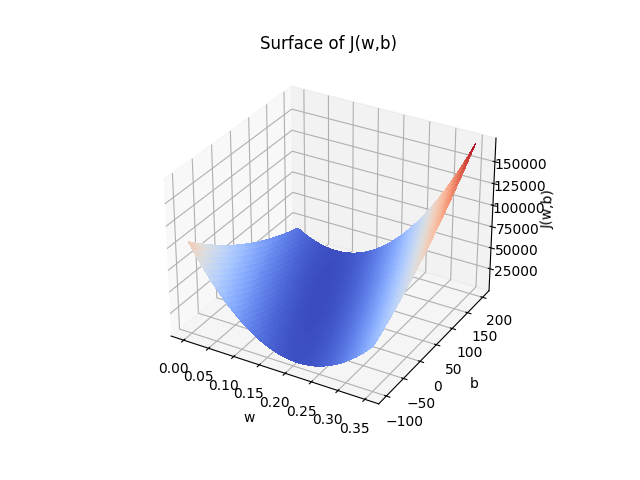

In [ ]:
from matplotlib import cm
plt.close()
J_fig, J_ax = plt.subplots(subplot_kw={"projection": "3d"})
plt.title("Surface of J(w,b)")
surf = J_ax.plot_surface(wv, bv, J_wb, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
J_ax.set(xlabel="w",
       ylabel="b",
       zlabel="J(w,b)")
plt.show()


- **Method 3:** Use plt.contour

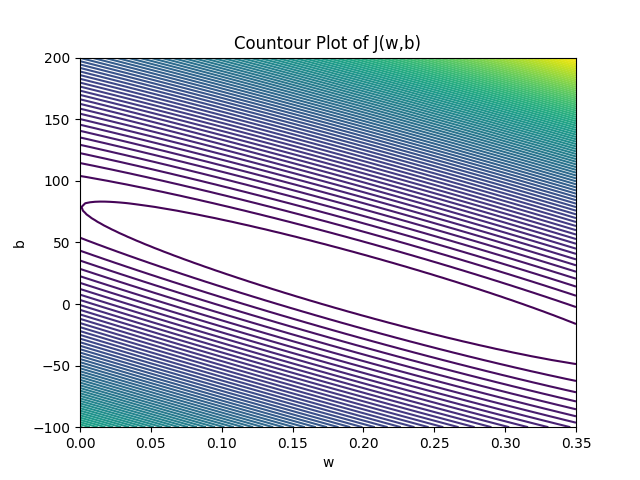

In [ ]:
levels = np.logspace(np.amin(J_wb),np.amax(J_wb),20)
plt.close()
plt.title("Countour Plot of J(w,b)")
plt.contour(w,b,J_wb,100)
plt.xlabel("w")
plt.ylabel("b")
plt.show()
#print(np.amin(J_wb))
#print(np.amax(J_wb))

5. Do a "Sanity Check" to make sure the minimum point in this shape is near the expected min (from built-in functions):

In [ ]:
J_min = np.amin(J_wb)
w_ind, b_ind = np.where(J_wb == J_min)
# The above method may not be a useful function to use when there isn't only one minimum.
print("Answer = [ 0.13452529, 71.27049245]")
print(f"Prediction = [{w[w_ind[0]]}, {b[b_ind[0]]}]")
print("Close enough... decreasing the step size of w and b will improve answer, but significantly increases computation time.")

Answer = [ 0.13452529, 71.27049245]
Prediction = [0.13434343434343435, 72.72727272727272]
Close enough... decreasing the step size of w and b will improve answer, but significantly increases computation time.


### Code the gradient descent function
1. Function to calculate partial derivates of J(w,b)
   - As a reminder, they are this:
$$
\begin{align}
\frac{\partial J(w,b)}{\partial w}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})x^{(i)} \tag{1}\\
  \frac{\partial J(w,b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)}) \tag{2}\\
\end{align}
$$

In [ ]:
def calculate_dJ(w,b,x,y):
    """ 
    Calculates the partial derivatives of linear regression cost function, J(w,b), for some value of w and b.
    Inputs:
        w,b : current guess for w and b
        x,y : input and output of training data, respectively
    Outputs:
        dJdw, dJdb: scalars representing the partial derivative of J w.r.t. w and b, respectively.
    """
    m = x.shape[0]
    
    dJdw = 0
    dJdb = 0
    for i in range(m):
        dJdw = dJdw + (calculate_f_wb(w,b,x[i]) - y[i])*x[i]
        dJdb = dJdb + (calculate_f_wb(w,b,x[i]) - y[i])
    dJdw = dJdw/m
    dJdb = dJdb/m

    return dJdw, dJdb

2. Function to perform gradient descent:
$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline
\;  w &= w -  \alpha \frac{\partial J(w,b)}{\partial w} \tag{3}  \; \newline 
b &= b -  \alpha \frac{\partial J(w,b)}{\partial b}  \newline \rbrace
\end{align*}$$

- A couple of things I am noticing from designing the below algorithm...
    1. One must set a maximum amount of iterations, since it is fairly easy to set alpha too large, resulting in divergence (infinite loop)
    2. The slope of J(w,b) for the w and b directions is orders of magnitude different.  w will converge much faster than b.
    3. There should be some "tolerance" level at which changes less than that value are considered "0".
        - Not sure what Python's considers to be 0, but it's definitely smaller than 1e-12 (because inputing 0 worked, and was more accurate than tolerance of 1e-12).
        - Options to stop the loop:
            - When $\Delta J$ < 0 & tolerance.
            - When $\Delta w$ & $\Delta b$ < tolerance.
                - I chose this one.
    5. In real life cases, some optimization of alpha will be required.  I'm sure there exists many solutions of which I will hopefully learn.
        - For now, the simplest solutions I can think of are:
            1. Set different values of alpha for each direction (probably not recommended)
                - I ended up choosing this one
                - I learned in a later video that I probably should have done *feature scaling*...
            3. Run a ricidulously large amount of iterations (also not recommended)
            4. Iteratively change alpha depending on certain transients within the algorithm like...
                - Second Derivative of J was suggested by my boyfriend who knows a bit more.
                - Rate of change of w or b compared to absolute value
   

In [ ]:
def find_wb_min(alpha,w,b,x,y):
    """ 
    Finds the values of w and b that minimizes the least squares cost function for linear model.
    Inputs:
        alpha : Scalar -- learning rate for ML algorithm.
        w,b : initial guesses for w and b
        x,y : input and output of training data, respectively.
    Outputs:
        w_min,b_min: (Scalar) values of w and b that minimize the cost function J(w,b)
    """
    tolerance = 1e-9
    w_current = w
    b_current = b

    print("\n Initiating Teresa's Gradient Descent... \n ")
    
    for i in range(0,10000): # setting max number of iterations to 10000
        dJdw, dJdb = calculate_dJ(w_current,b_current,x,y)
        w_temp = w_current - alpha*dJdw
        b_temp = b_current - 1e5*alpha*dJdb

        w_dif = np.abs(w_temp - w_current)
        b_dif = np.abs(b_temp - b_current)

        if (w_dif <= tolerance) & (b_dif <= tolerance ):
            print(f"Minimum Found. Number of iterations attempted: {i+1}")
            break
        else:
            w_current = w_temp
            b_current = b_temp
    if (w_dif > tolerance) or (b_dif > tolerance):
        print("Unable to converge")
        if (w_dif != 0):
            print("Could not find w_min.")
        if (b_dif != 0 ):
            print("Could not find b_min.")
    w_min = w_current
    b_min = b_current
    return print(f"Result: {[w_min, b_min]}")

3. Run the optimization algorithm.

In [ ]:
print("Result from polyfit: [ 0.13452529, 71.27049245]")
find_wb_min(4e-7,0,0,x,y)

Result from polyfit: [ 0.13452529, 71.27049245]

 Initiating Teresa's Gradient Descent... 
 
Minimum Found. Number of iterations attempted: 3731
Result: [0.13452528780250864, 71.27049225926173]


### Declare SUCCESS